# Comparison of Neural Models on pretrained Word2Vec embeddings

## Feedforward Neural Network

Following an experiment to compare neural models, we discovered odd results showing that bag of words could outperform embeddings. This experiment attempts to tweak the embeddings to show the expected results under the assumption that the problem is not the amount of data. If the problem is the amount of data we will investigate this in another experiment.

Again, we will show Bag of Words results:

In [1]:
from scripts import training_helpers
from scripts.cross_validate import run_cross_validate
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Embedding, MaxPooling2D, LSTM
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold, train_test_split, StratifiedShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping
from pandas import DataFrame
from seaborn import boxplot
from notebooks.yelp.metrics import auroc, f1
import matplotlib.pyplot as plt
import json
import statistics

import gensim
import numpy as np

import tensorflow as tf
import pandas as pd

read_existing_embeddings = False

Using TensorFlow backend.


In [2]:
downloaded = tf.keras.utils.get_file(
             fname="opspam.pkl",
             origin="https://storage.googleapis.com/lucas0/opspam.pkl",
             extract=False)
data_frame = pd.read_pickle(downloaded).sample(frac=1).reset_index(drop=True)

raw_features = data_frame['review']
labels = [x for x in data_frame['deceptive']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(raw_features)
bow_features = tokenizer.texts_to_matrix(raw_features, mode='tfidf')

In [3]:
corpus_words = tokenizer.word_index
corpus_vocab_size = len(corpus_words)+1

In [4]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2)

In [5]:
def get_ff_bow_model():
  model = Sequential([
      Dense(16, activation=relu, input_shape=(corpus_vocab_size,), kernel_regularizer=l2(0.01)),
      Dropout(0.25),
      Dense(8, activation=relu, kernel_regularizer=l2(0.01)),
      Dense(1, activation=sigmoid)
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auroc, f1])
  return model

In [6]:
def evaluate_ffnn_model(train_X, train_y, test_X, test_y):
    ffnn_model = get_ff_bow_model()
    return ffnn_model.fit(train_X, train_y, epochs=25, batch_size=32, verbose=1, shuffle=False,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
                   validation_data=(test_X, test_y))

ff_bow_scores = run_cross_validate(evaluate_ffnn_model, bow_features, labels, splitter, cv=10, verbose=0)

Train on 1280 samples, validate on 320 samples
Epoch 1/25
1280/1280 [==============================] - 1s 523us/step - loss: 0.8211 - acc: 0.6805 - auroc: 0.7416 - f1: 0.6451 - val_loss: 0.5986 - val_acc: 0.8688 - val_auroc: 0.9378 - val_f1: 0.8602
Epoch 2/25
1280/1280 [==============================] - 0s 141us/step - loss: 0.4457 - acc: 0.9117 - auroc: 0.9755 - f1: 0.9071 - val_loss: 0.5149 - val_acc: 0.8750 - val_auroc: 0.9429 - val_f1: 0.8806
Epoch 3/25
1280/1280 [==============================] - 0s 142us/step - loss: 0.3148 - acc: 0.9742 - auroc: 0.9959 - f1: 0.9729 - val_loss: 0.4764 - val_acc: 0.8812 - val_auroc: 0.9430 - val_f1: 0.8843
Epoch 4/25
1280/1280 [==============================] - 0s 140us/step - loss: 0.2541 - acc: 0.9867 - auroc: 0.9991 - f1: 0.9870 - val_loss: 0.4489 - val_acc: 0.8875 - val_auroc: 0.9478 - val_f1: 0.8846
Epoch 5/25
1280/1280 [==============================] - 0s 145us/step - loss: 0.2263 - acc: 0.9883 - auroc: 0.9995 - f1: 0.9872 - val_loss: 0.455

Epoch 14/25
1280/1280 [==============================] - 0s 135us/step - loss: 0.1502 - acc: 0.9977 - auroc: 1.0000 - f1: 0.9976 - val_loss: 0.3915 - val_acc: 0.8938 - val_auroc: 0.9596 - val_f1: 0.8959
Epoch 15/25
1280/1280 [==============================] - 0s 132us/step - loss: 0.1429 - acc: 0.9977 - auroc: 1.0000 - f1: 0.9977 - val_loss: 0.3768 - val_acc: 0.8875 - val_auroc: 0.9604 - val_f1: 0.8895
Epoch 16/25
1280/1280 [==============================] - 0s 129us/step - loss: 0.1464 - acc: 0.9937 - auroc: 0.9998 - f1: 0.9940 - val_loss: 0.3787 - val_acc: 0.8844 - val_auroc: 0.9597 - val_f1: 0.8864
Epoch 17/25
1280/1280 [==============================] - 0s 133us/step - loss: 0.1435 - acc: 0.9937 - auroc: 1.0000 - f1: 0.9937 - val_loss: 0.3802 - val_acc: 0.8844 - val_auroc: 0.9621 - val_f1: 0.8892
Epoch 18/25
1280/1280 [==============================] - 0s 134us/step - loss: 0.1403 - acc: 0.9992 - auroc: 1.0000 - f1: 0.9992 - val_loss: 0.3692 - val_acc: 0.8875 - val_auroc: 0.9620 - 

Epoch 11/25
1280/1280 [==============================] - 0s 142us/step - loss: 0.1751 - acc: 0.9953 - auroc: 1.0000 - f1: 0.9954 - val_loss: 0.3916 - val_acc: 0.8781 - val_auroc: 0.9536 - val_f1: 0.8790
Epoch 12/25
1280/1280 [==============================] - 0s 144us/step - loss: 0.1651 - acc: 0.9961 - auroc: 0.9999 - f1: 0.9961 - val_loss: 0.3778 - val_acc: 0.8875 - val_auroc: 0.9584 - val_f1: 0.8859
Epoch 13/25
1280/1280 [==============================] - 0s 134us/step - loss: 0.1617 - acc: 0.9961 - auroc: 0.9997 - f1: 0.9966 - val_loss: 0.3745 - val_acc: 0.8906 - val_auroc: 0.9569 - val_f1: 0.8838
Epoch 14/25
1280/1280 [==============================] - 0s 144us/step - loss: 0.1507 - acc: 0.9969 - auroc: 1.0000 - f1: 0.9967 - val_loss: 0.3781 - val_acc: 0.8719 - val_auroc: 0.9576 - val_f1: 0.8714
Epoch 15/25
1280/1280 [==============================] - 0s 141us/step - loss: 0.1422 - acc: 0.9977 - auroc: 1.0000 - f1: 0.9979 - val_loss: 0.3758 - val_acc: 0.8719 - val_auroc: 0.9575 - 

Epoch 12/25
1280/1280 [==============================] - 0s 142us/step - loss: 0.1488 - acc: 0.9922 - auroc: 0.9999 - f1: 0.9921 - val_loss: 0.4094 - val_acc: 0.8750 - val_auroc: 0.9481 - val_f1: 0.8721
Epoch 13/25
1280/1280 [==============================] - 0s 140us/step - loss: 0.1427 - acc: 0.9969 - auroc: 0.9999 - f1: 0.9968 - val_loss: 0.4287 - val_acc: 0.8594 - val_auroc: 0.9465 - val_f1: 0.8545
Epoch 14/25
1280/1280 [==============================] - 0s 142us/step - loss: 0.1400 - acc: 0.9945 - auroc: 1.0000 - f1: 0.9943 - val_loss: 0.4371 - val_acc: 0.8625 - val_auroc: 0.9432 - val_f1: 0.8605
Epoch 15/25
1280/1280 [==============================] - 0s 139us/step - loss: 0.1314 - acc: 0.9992 - auroc: 0.9999 - f1: 0.9992 - val_loss: 0.4391 - val_acc: 0.8750 - val_auroc: 0.9479 - val_f1: 0.8692
Epoch 16/25
1280/1280 [==============================] - 0s 139us/step - loss: 0.1308 - acc: 0.9937 - auroc: 0.9997 - f1: 0.9936 - val_loss: 0.4256 - val_acc: 0.8781 - val_auroc: 0.9479 - 

Epoch 3/25
1280/1280 [==============================] - 0s 151us/step - loss: 0.4209 - acc: 0.9344 - auroc: 0.9835 - f1: 0.9358 - val_loss: 0.4854 - val_acc: 0.8656 - val_auroc: 0.9434 - val_f1: 0.8663
Epoch 4/25
1280/1280 [==============================] - 0s 142us/step - loss: 0.3183 - acc: 0.9531 - auroc: 0.9942 - f1: 0.9527 - val_loss: 0.4528 - val_acc: 0.8688 - val_auroc: 0.9453 - val_f1: 0.8646
Epoch 5/25
1280/1280 [==============================] - 0s 147us/step - loss: 0.2642 - acc: 0.9773 - auroc: 0.9985 - f1: 0.9783 - val_loss: 0.4503 - val_acc: 0.8688 - val_auroc: 0.9399 - val_f1: 0.8627
Epoch 6/25
1280/1280 [==============================] - 0s 145us/step - loss: 0.2249 - acc: 0.9859 - auroc: 0.9989 - f1: 0.9845 - val_loss: 0.4476 - val_acc: 0.8656 - val_auroc: 0.9399 - val_f1: 0.8618
Epoch 7/25
1280/1280 [==============================] - 0s 143us/step - loss: 0.2031 - acc: 0.9906 - auroc: 0.9997 - f1: 0.9893 - val_loss: 0.4431 - val_acc: 0.8719 - val_auroc: 0.9447 - val_f

And now we will get results for embeddings. This time I will use pretrained Word2Vec. Although this was not trained directly on words from our dataset, the Word2Vec has a higher dimensionality (making it harder to run on our machines) and so may show better results.

In [7]:
def results(scores):
    bests = []
    for his in scores:
        best = None
        min_val_loss = 99999
        h = his.history
        for i, val_loss in enumerate(h['val_loss']):
            if val_loss < min_val_loss:
                min_val_loss = val_loss
                best = { 'val_loss': val_loss, 'val_accuracy': h['val_acc'][i], 'val_auroc': h['auroc'][i], 'val_f1': h['val_f1'][i]}
        bests.append(best)
    return bests

In [8]:
bests = results(ff_bow_scores)

In [9]:
bests, statistics.mean([x['val_accuracy'] for x in bests])

([{'val_accuracy': 0.8875,
   'val_auroc': 0.9991180117880486,
   'val_f1': 0.884575891494751,
   'val_loss': 0.4488638907670975},
  {'val_accuracy': 0.875,
   'val_auroc': 1.0,
   'val_f1': 0.8665441572666168,
   'val_loss': 0.4275026202201843},
  {'val_accuracy': 0.9125,
   'val_auroc': 1.0,
   'val_f1': 0.9129968762397767,
   'val_loss': 0.3421775847673416},
  {'val_accuracy': 0.875,
   'val_auroc': 1.0,
   'val_f1': 0.8668681204319,
   'val_loss': 0.3691168874502182},
  {'val_accuracy': 0.890625,
   'val_auroc': 0.9996875,
   'val_f1': 0.8838273704051971,
   'val_loss': 0.37449787706136706},
  {'val_accuracy': 0.896875,
   'val_auroc': 0.9999019607843138,
   'val_f1': 0.8969626903533936,
   'val_loss': 0.34524360597133635},
  {'val_accuracy': 0.86875,
   'val_auroc': 0.9998039215686274,
   'val_f1': 0.8717897593975067,
   'val_loss': 0.4060693964362144},
  {'val_accuracy': 0.871875,
   'val_auroc': 0.9998987854251012,
   'val_f1': 0.8607736051082611,
   'val_loss': 0.42393360435962

In [10]:
embedding_matrix = None
embedding_length = 0

word_vectors = gensim.models.KeyedVectors.load_word2vec_format("../../data/GoogleNews-vectors-negative300.bin",
                                                                 binary=True)
embedding_length = word_vectors.vector_size
    
embedding_matrix = np.zeros((corpus_vocab_size, embedding_length))
for word, index in corpus_words.items():
  if word in word_vectors.vocab:
    embedding_matrix[index] = np.array(word_vectors[word], dtype=np.float32)

In [11]:
def get_ff_wv_model():
  model_ff_wv = Sequential([
      Embedding(corpus_vocab_size, embedding_length, weights=[embedding_matrix], trainable=False,
                input_length=corpus_vocab_size),
      Flatten(),
      Dense(16, activation=relu, kernel_regularizer=l2(0.01)),
      Dropout(0.25),
      Dense(8, activation=relu, kernel_regularizer=l2(0.01)),
      Dense(1, activation=sigmoid)
  ])
  model_ff_wv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auroc, f1])
  return model_ff_wv

In [8]:
def evaluate_ffnn_model(train_X, train_y, test_X, test_y):
    ffnn_model = get_ff_wv_model()
    return ffnn_model.fit(train_X, train_y, epochs=25, batch_size=32, verbose=1, shuffle=False,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
                   validation_data=(test_X, test_y))

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
ff_wv_scores = run_cross_validate(evaluate_ffnn_model, bow_features, labels, splitter, cv=10, verbose=0)

Train on 1440 samples, validate on 160 samples
Epoch 1/25
1440/1440 [==============================] - 30s 21ms/step - loss: 0.9887 - acc: 0.5604 - auroc: 0.6524 - f1: 0.2396 - val_loss: 1.0446 - val_acc: 0.6000 - val_auroc: 0.8253 - val_f1: 0.3246
Epoch 2/25
1440/1440 [==============================] - 24s 17ms/step - loss: 1.0809 - acc: 0.6417 - auroc: 0.7355 - f1: 0.5392 - val_loss: 1.0094 - val_acc: 0.6000 - val_auroc: 0.7975 - val_f1: 0.3796
Epoch 3/25
1440/1440 [==============================] - 24s 17ms/step - loss: 0.9907 - acc: 0.6785 - auroc: 0.7631 - f1: 0.5929 - val_loss: 0.9520 - val_acc: 0.6375 - val_auroc: 0.8102 - val_f1: 0.4555
Epoch 4/25
1440/1440 [==============================] - 24s 17ms/step - loss: 0.9458 - acc: 0.6847 - auroc: 0.7736 - f1: 0.6303 - val_loss: 0.8963 - val_acc: 0.6375 - val_auroc: 0.8281 - val_f1: 0.4484
Epoch 5/25
1440/1440 [==============================] - 24s 17ms/step - loss: 0.9121 - acc: 0.7132 - auroc: 0.7937 - f1: 0.6719 - val_loss: 0.888

In [9]:
ff_wv_bests = results(ff_wv_scores)
ff_wv_bests, statistics.mean([x['val_accuracy'] for x in ff_wv_bests])

([{'val_accuracy': 0.71875,
   'val_auroc': 0.7936700483169452,
   'val_f1': 0.6382959127426148,
   'val_loss': 0.8887249827384949},
  {'val_accuracy': 0.65,
   'val_auroc': 0.6275774079244152,
   'val_f1': 0.49876795411109925,
   'val_loss': 0.9560416460037231},
  {'val_accuracy': 0.7,
   'val_auroc': 0.8567476988895654,
   'val_f1': 0.6803570866584778,
   'val_loss': 1.211377453804016},
  {'val_accuracy': 0.60625,
   'val_auroc': 0.6669282862851145,
   'val_f1': 0.7080702066421509,
   'val_loss': 0.9501791834831238},
  {'val_accuracy': 0.7375,
   'val_auroc': 0.6739759650358529,
   'val_f1': 0.7046153306961059,
   'val_loss': 1.0436803579330445},
  {'val_accuracy': 0.7,
   'val_auroc': 0.83001717099607,
   'val_f1': 0.6711758196353912,
   'val_loss': 1.1039915561676026},
  {'val_accuracy': 0.73125,
   'val_auroc': 0.7139770079523986,
   'val_f1': 0.6781166434288025,
   'val_loss': 1.1022765398025514},
  {'val_accuracy': 0.7,
   'val_auroc': 0.7024625967749485,
   'val_f1': 0.73667472

In [11]:
ff_scores_entries =[('Bag of Words', x['val_accuracy']) for x in bests] + [('Word Vectors', x['val_accuracy']) for x in ff_wv_bests]
ff_scores_data_frame = DataFrame(ff_scores_entries, columns=['input type', 'accuracy'])

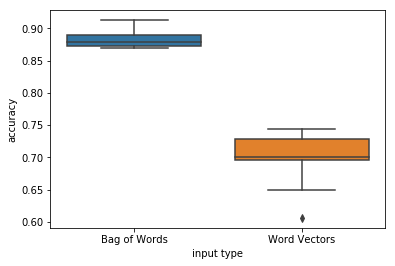

In [12]:
boxplot(x='input type', y='accuracy', data=ff_scores_data_frame)
plt.show()

It looks like word vectors are doing better now! Although they should be more accurate than Bag of Words, unless this is an exceptional case. The next step here is to investigate how BoW and word vectors perform on more data, since a small amount of data is a case known to cause results like this. It is also very unlikely Bag of Words will perform as well on a large dataset.

## Convolutional Neural Network

Research has shown that word embeddings perform better than Bag of Words (Convolutional Neural Networks for Sentence Classification, Yoon Kim 2014). We will use our convolutional network on pretrained Word2Vec embeddings to see if we obtain an improved accuracy. First we will obtain results for bag of words again:

In [16]:
batches = 1600
convolutional_data = np.array(np.split(np.array([[[y] for y in z] for z in bow_features]), batches))
convolutional_data.shape

(1600, 1, 9839, 1)

In [17]:
def get_conv_bow_model():
  model = Sequential([
      Conv2D(
          filters=50,
          kernel_size=(1, 10),
          data_format="channels_last",
          input_shape=(1, corpus_vocab_size, 1),
          activation=relu),
      MaxPooling2D(pool_size=(1, 10)),
      Dropout(0.2),
      Flatten(),
      Dense(2, activation='softmax')
  ])
  model.compile(
      loss='binary_crossentropy',
      optimizer='adam',
      metrics=['accuracy', auroc, f1])
  return model

In [18]:
def evaluate_conv_model(train_X, train_y, test_X, test_y):
    conv_model = get_conv_bow_model()
    return conv_model.fit(train_X, train_y, epochs=25, batch_size=34, verbose=1, shuffle=False,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=6)],
                   validation_data=(test_X, test_y))

In [19]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
conv_bow_scores = run_cross_validate(evaluate_conv_model, convolutional_data, labels, splitter, cv=10, categorical=True)

Train on 1440 samples, validate on 160 samples
Epoch 1/25
1440/1440 [==============================] - 7s 5ms/step - loss: 0.7179 - acc: 0.5611 - auroc: 0.6229 - f1: 0.5611 - val_loss: 0.6476 - val_acc: 0.6313 - val_auroc: 0.7103 - val_f1: 0.6312
Epoch 2/25
1440/1440 [==============================] - 4s 3ms/step - loss: 0.4409 - acc: 0.8104 - auroc: 0.9065 - f1: 0.8104 - val_loss: 0.6162 - val_acc: 0.6813 - val_auroc: 0.7666 - val_f1: 0.6812
Epoch 3/25
1440/1440 [==============================] - 4s 3ms/step - loss: 0.3189 - acc: 0.8681 - auroc: 0.9514 - f1: 0.8681 - val_loss: 0.6425 - val_acc: 0.6563 - val_auroc: 0.7669 - val_f1: 0.6562
Epoch 4/25
1440/1440 [==============================] - 4s 3ms/step - loss: 0.2325 - acc: 0.9174 - auroc: 0.9775 - f1: 0.9174 - val_loss: 0.7159 - val_acc: 0.6562 - val_auroc: 0.7609 - val_f1: 0.6562
Epoch 5/25
1440/1440 [==============================] - 4s 3ms/step - loss: 0.1771 - acc: 0.9403 - auroc: 0.9899 - f1: 0.9403 - val_loss: 1.0124 - val_ac

In [20]:
conv_bow_bests = results(conv_bow_scores)
conv_bow_bests, statistics.mean([x['val_accuracy'] for x in conv_bow_bests])

([{'val_accuracy': 0.6812500104308128,
   'val_auroc': 0.9065476436334551,
   'val_f1': 0.681249950826168,
   'val_loss': 0.616241792589426},
  {'val_accuracy': 0.6562500067055226,
   'val_auroc': 0.619058912856078,
   'val_f1': 0.6562499471008778,
   'val_loss': 0.6031138226389885},
  {'val_accuracy': 0.6125000156462193,
   'val_auroc': 0.6385484442248793,
   'val_f1': 0.6124999560415745,
   'val_loss': 0.7345238126814365},
  {'val_accuracy': 0.6437500201165676,
   'val_auroc': 0.6392952605865928,
   'val_f1': 0.6437499605119228,
   'val_loss': 0.6495866138488054},
  {'val_accuracy': 0.6562500067055226,
   'val_auroc': 0.9226500976210343,
   'val_f1': 0.6562499471008778,
   'val_loss': 0.6499350242316723},
  {'val_accuracy': 0.6312499962747097,
   'val_auroc': 0.9589272395805188,
   'val_f1': 0.6312499366700649,
   'val_loss': 0.7519850976765156},
  {'val_accuracy': 0.6812499903142453,
   'val_auroc': 0.6151408407339134,
   'val_f1': 0.6812499351799488,
   'val_loss': 0.58162705153226

We filter out reviews with more than 300 words because a small number have an exceptionally large number of words and dramatically increase the memory requirements. These reviews are rare and are not expected to provide much value, while also preventing this experiment from being run on a normal machine, so I will filter them out

In [21]:
reviews_words = []
conv_wv_labels = []
for i, raw_feature in enumerate(raw_features):
    word_sequence = text_to_word_sequence(raw_feature)
    if len(word_sequence) > 320:
        continue
    conv_wv_labels.append(labels[i])
    reviews_words.append(word_sequence)
max_review_len = max([len(x) for x in reviews_words])

vectorized_reviews = np.zeros((len(reviews_words), max_review_len, 300, 1))
for i, review in enumerate(reviews_words):
    for j, word in enumerate(review):
        vectorized_reviews[i][j] = [[x] for x in embedding_matrix[corpus_words[word]]]

In [22]:
def get_conv_wv_model():
  model = Sequential([
      Conv2D(
          filters=50,
          kernel_size=(10, 300),
          data_format="channels_last",
          input_shape=(320, 300, 1),
          activation=relu),
      MaxPooling2D(strides=(1, 1), pool_size=(2, 1), data_format="channels_last"),
      Dropout(0.2),
      Flatten(),
      Dense(2, activation='softmax')
  ])
  model.compile(
      loss='binary_crossentropy',
      optimizer='adam',
      metrics=['accuracy', auroc, f1])
  return model

In [23]:
def evaluate_conv_wv_model(train_X, train_y, test_X, test_y):
    conv_model = get_conv_wv_model()
    return conv_model.fit(train_X, train_y, epochs=25, batch_size=34, verbose=1, shuffle=False,
                   callbacks=[EarlyStopping(monitor='val_loss', patience=6)],
                   validation_data=(test_X, test_y))

In [24]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
conv_wv_scores = run_cross_validate(evaluate_conv_wv_model, vectorized_reviews, conv_wv_labels, splitter, cv=10, categorical=True)

Train on 1371 samples, validate on 153 samples
Epoch 1/25
1371/1371 [==============================] - 9s 6ms/step - loss: 0.6636 - acc: 0.5988 - auroc: 0.6715 - f1: 0.5988 - val_loss: 0.6126 - val_acc: 0.6928 - val_auroc: 0.7107 - val_f1: 0.6928
Epoch 2/25
1371/1371 [==============================] - 4s 3ms/step - loss: 0.4742 - acc: 0.7812 - auroc: 0.8929 - f1: 0.7812 - val_loss: 0.5657 - val_acc: 0.7320 - val_auroc: 0.7703 - val_f1: 0.7320
Epoch 3/25
1371/1371 [==============================] - 4s 3ms/step - loss: 0.3143 - acc: 0.8738 - auroc: 0.9602 - f1: 0.8738 - val_loss: 0.5415 - val_acc: 0.7059 - val_auroc: 0.7801 - val_f1: 0.7059
Epoch 4/25
1371/1371 [==============================] - 4s 3ms/step - loss: 0.2090 - acc: 0.9220 - auroc: 0.9916 - f1: 0.9220 - val_loss: 0.6968 - val_acc: 0.6863 - val_auroc: 0.7865 - val_f1: 0.6863
Epoch 5/25
1371/1371 [==============================] - 4s 3ms/step - loss: 0.1539 - acc: 0.9489 - auroc: 0.9984 - f1: 0.9489 - val_loss: 0.5729 - val_ac

Epoch 4/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.1989 - acc: 0.9351 - auroc: 0.9916 - f1: 0.9351 - val_loss: 0.4229 - val_acc: 0.8039 - val_auroc: 0.9024 - val_f1: 0.8039
Epoch 5/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.1357 - acc: 0.9562 - auroc: 0.9991 - f1: 0.9562 - val_loss: 0.5837 - val_acc: 0.7974 - val_auroc: 0.8951 - val_f1: 0.7974
Epoch 6/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.1780 - acc: 0.9234 - auroc: 0.9992 - f1: 0.9234 - val_loss: 0.5963 - val_acc: 0.7843 - val_auroc: 0.8524 - val_f1: 0.7843
Epoch 7/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.1166 - acc: 0.9716 - auroc: 0.9989 - f1: 0.9716 - val_loss: 0.5021 - val_acc: 0.7712 - val_auroc: 0.8763 - val_f1: 0.7712
Epoch 8/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.0325 - acc: 0.9993 - auroc: 1.0000 - f1: 0.9993 - val_loss: 0.6919 - val_acc: 0.7255 - val_auroc: 0.8726 - val_f1: 0.7255


Epoch 6/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.0936 - acc: 0.9818 - auroc: 0.9997 - f1: 0.9818 - val_loss: 0.4960 - val_acc: 0.7843 - val_auroc: 0.8692 - val_f1: 0.7843
Epoch 7/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.0325 - acc: 0.9985 - auroc: 1.0000 - f1: 0.9985 - val_loss: 0.4929 - val_acc: 0.7974 - val_auroc: 0.8904 - val_f1: 0.7974
Epoch 8/25
1371/1371 [==============================] - 3s 3ms/step - loss: 0.0199 - acc: 0.9993 - auroc: 1.0000 - f1: 0.9993 - val_loss: 0.5187 - val_acc: 0.7712 - val_auroc: 0.8866 - val_f1: 0.7712
Epoch 9/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.0130 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.5252 - val_acc: 0.7974 - val_auroc: 0.9017 - val_f1: 0.7974
Epoch 10/25
1371/1371 [==============================] - 3s 2ms/step - loss: 0.0078 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.5980 - val_acc: 0.7843 - val_auroc: 0.8992 - val_f1: 0.7843

In [25]:
conv_wv_bests = results(conv_wv_scores)
conv_wv_bests, statistics.mean([x['val_accuracy'] for x in conv_wv_bests])

([{'val_accuracy': 0.7058823506037394,
   'val_auroc': 0.9601902103061325,
   'val_f1': 0.7058822909990946,
   'val_loss': 0.541508310370975},
  {'val_accuracy': 0.8169934617148505,
   'val_auroc': 0.968131444477296,
   'val_f1': 0.8169934021102058,
   'val_loss': 0.3934679494963752},
  {'val_accuracy': 0.8039215736918979,
   'val_auroc': 0.9852851516752751,
   'val_f1': 0.8039215140872531,
   'val_loss': 0.3812228772375319},
  {'val_accuracy': 0.8235294156604342,
   'val_auroc': 0.9935402395406223,
   'val_f1': 0.8235293560557895,
   'val_loss': 0.3879835108915965},
  {'val_accuracy': 0.8039215803146362,
   'val_auroc': 0.9916042444946963,
   'val_f1': 0.8039215207099915,
   'val_loss': 0.42290018333329094},
  {'val_accuracy': 0.7385621070861816,
   'val_auroc': 0.9159913336931205,
   'val_f1': 0.7385620474815369,
   'val_loss': 0.4906387991375393},
  {'val_accuracy': 0.8104575210147433,
   'val_auroc': 0.9645749473307322,
   'val_f1': 0.8104574680328369,
   'val_loss': 0.403537680705

In [26]:
conv_scores_entries =[('Bag of Words', x['val_accuracy']) for x in conv_bow_bests] + [('Word Vectors', x['val_accuracy']) for x in conv_wv_bests]
conv_scores_data_frame = DataFrame(conv_scores_entries, columns=['input type', 'accuracy'])

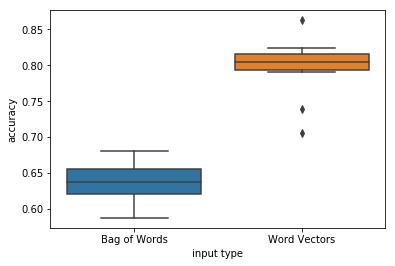

In [27]:
boxplot(x='input type', y='accuracy', data=conv_scores_data_frame)
plt.show()

Again our results look better. If this continues to be consistent we know that Word2Vec has some property that is beneficial, which may be training on more data, or it may be the higher vector dimensionality.

## Recurrent Neural Network (LSTM)

The final experiment we will run to test the results of using pretrained Word2Vec embeddings will be our LSTM network. 
In the previous test we did with word embeddings, our accuracy was 50%, so simply a random guess. Following the trend above of pretrained embeddings giving us better accuracies, we will run a test and see if this can give any improvements for the LSTM network.

First, let's get our BOW accuracies.

In [28]:
batches = 1600
padded = pad_sequences(bow_features)
rnn_bow = np.array(np.split(padded, batches))
max_len_bow = max([len(x) for x in padded])
rnn_bow_targets = np.array([[x] for x in labels])

In [29]:
def get_rnn_bow_model():
  model = Sequential([
      LSTM(20, input_shape=(1, max_len_bow)),
      Dense(1, activation='sigmoid')
  ])
  model.compile(
      loss='binary_crossentropy',
      optimizer='adam',
      metrics=['accuracy', auroc, f1])
  return model

In [30]:
def evaluate_lstm_model(train_X, train_y, test_X, test_y):
    lstm_model = get_rnn_bow_model()
    return lstm_model.fit(train_X, train_y, epochs=25, batch_size=32, verbose=1, shuffle=False,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=6)], validation_data=(test_X, test_y))

In [31]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
rnn_bow_scores = run_cross_validate(evaluate_lstm_model, rnn_bow, rnn_bow_targets, splitter, cv=10)

Train on 1440 samples, validate on 160 samples
Epoch 1/25
1440/1440 [==============================] - 7s 5ms/step - loss: 0.5324 - acc: 0.7757 - auroc: 0.8500 - f1: 0.7735 - val_loss: 0.3632 - val_acc: 0.8688 - val_auroc: 0.9383 - val_f1: 0.8669
Epoch 2/25
1440/1440 [==============================] - 0s 272us/step - loss: 0.1040 - acc: 0.9826 - auroc: 0.9985 - f1: 0.9820 - val_loss: 0.3090 - val_acc: 0.8812 - val_auroc: 0.9407 - val_f1: 0.8765
Epoch 3/25
1440/1440 [==============================] - 0s 268us/step - loss: 0.0364 - acc: 0.9993 - auroc: 1.0000 - f1: 0.9994 - val_loss: 0.2971 - val_acc: 0.8562 - val_auroc: 0.9431 - val_f1: 0.8621
Epoch 4/25
1440/1440 [==============================] - 0s 268us/step - loss: 0.0191 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.3008 - val_acc: 0.8562 - val_auroc: 0.9455 - val_f1: 0.8621
Epoch 5/25
1440/1440 [==============================] - 0s 266us/step - loss: 0.0118 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.3035 

1440/1440 [==============================] - 9s 7ms/step - loss: 0.5390 - acc: 0.7847 - auroc: 0.8475 - f1: 0.7709 - val_loss: 0.3829 - val_acc: 0.8812 - val_auroc: 0.9212 - val_f1: 0.8816
Epoch 2/25
1440/1440 [==============================] - 0s 295us/step - loss: 0.1202 - acc: 0.9778 - auroc: 0.9983 - f1: 0.9770 - val_loss: 0.3163 - val_acc: 0.8625 - val_auroc: 0.9361 - val_f1: 0.8642
Epoch 3/25
1440/1440 [==============================] - 0s 283us/step - loss: 0.0432 - acc: 0.9986 - auroc: 1.0000 - f1: 0.9984 - val_loss: 0.3430 - val_acc: 0.8500 - val_auroc: 0.9255 - val_f1: 0.8587
Epoch 4/25
1440/1440 [==============================] - 0s 286us/step - loss: 0.0232 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.3390 - val_acc: 0.8438 - val_auroc: 0.9304 - val_f1: 0.8536
Epoch 5/25
1440/1440 [==============================] - 0s 288us/step - loss: 0.0145 - acc: 1.0000 - auroc: 1.0000 - f1: 1.0000 - val_loss: 0.3396 - val_acc: 0.8438 - val_auroc: 0.9321 - val_f1: 0.8534
Epo

In [32]:
rnn_bow_bests = results(rnn_bow_scores)
rnn_bow_bests, statistics.mean([x['val_accuracy'] for x in rnn_bow_bests])

([{'val_accuracy': 0.85625,
   'val_auroc': 1.0,
   'val_f1': 0.8621114492416382,
   'val_loss': 0.29705649614334106},
  {'val_accuracy': 0.8875,
   'val_auroc': 0.9975583280999416,
   'val_f1': 0.8839776992797852,
   'val_loss': 0.33806551694869996},
  {'val_accuracy': 0.8625,
   'val_auroc': 1.0,
   'val_f1': 0.8601470232009888,
   'val_loss': 0.2629497766494751},
  {'val_accuracy': 0.875,
   'val_auroc': 0.9981377578771798,
   'val_f1': 0.8826005816459656,
   'val_loss': 0.3029003322124481},
  {'val_accuracy': 0.88125,
   'val_auroc': 1.0,
   'val_f1': 0.8647875547409057,
   'val_loss': 0.2791174933314323},
  {'val_accuracy': 0.85,
   'val_auroc': 0.9991914819881798,
   'val_f1': 0.855248773097992,
   'val_loss': 0.33604530096054075},
  {'val_accuracy': 0.8625,
   'val_auroc': 0.9976448998039991,
   'val_f1': 0.8582827329635621,
   'val_loss': 0.3098704099655151},
  {'val_accuracy': 0.90625,
   'val_auroc': 1.0,
   'val_f1': 0.9034559965133667,
   'val_loss': 0.2561005771160126},
  

BOW again gives us astoundingly good accuracies, but of course, because it's over a tiny amount of data.

Now let's try our pretrained Word2Vec embeddings, and compare it to our previous OpSpam embeddings.

In [33]:
predictors_sequences = pad_sequences(tokenizer.texts_to_sequences(raw_features))
max_len = max([len(x) for x in predictors_sequences])

In [34]:
def get_lstm_wv_model():
  model = Sequential([
        Embedding(corpus_vocab_size, embedding_length, weights=[embedding_matrix], input_length=max_len, trainable=False),
        LSTM(10),
        Dense(1, activation=sigmoid)
  ])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', auroc, f1])
  return model

In [35]:
def evaluate_lstm_model(train_X, train_y, test_X, test_y):
    lstm_model = get_lstm_wv_model()
    return lstm_model.fit(train_X, train_y, epochs=25, batch_size=32, verbose=1, shuffle=False,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=6)],
                          validation_data=(test_X, test_y))

In [36]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.1)
rnn_wv_scores = run_cross_validate(evaluate_lstm_model, predictors_sequences, labels, splitter, cv=10, verbose=1, epochs=12, batch_size=64, shuffle=True)

Train on 1440 samples, validate on 160 samples
Epoch 1/25
1440/1440 [==============================] - 38s 27ms/step - loss: 0.6883 - acc: 0.5368 - auroc: 0.5654 - f1: 0.5247 - val_loss: 0.6874 - val_acc: 0.5813 - val_auroc: 0.6041 - val_f1: 0.6137
Epoch 2/25
1440/1440 [==============================] - 28s 19ms/step - loss: 0.6620 - acc: 0.6312 - auroc: 0.6959 - f1: 0.6417 - val_loss: 0.6640 - val_acc: 0.6062 - val_auroc: 0.6536 - val_f1: 0.5576
Epoch 3/25
1440/1440 [==============================] - 28s 19ms/step - loss: 0.6138 - acc: 0.6681 - auroc: 0.7548 - f1: 0.6641 - val_loss: 0.6025 - val_acc: 0.7188 - val_auroc: 0.7446 - val_f1: 0.6765
Epoch 4/25
1440/1440 [==============================] - 28s 19ms/step - loss: 0.5891 - acc: 0.6979 - auroc: 0.7884 - f1: 0.6801 - val_loss: 0.6733 - val_acc: 0.6500 - val_auroc: 0.6854 - val_f1: 0.7158
Epoch 5/25
1440/1440 [==============================] - 28s 19ms/step - loss: 0.6718 - acc: 0.5958 - auroc: 0.7324 - f1: 0.6453 - val_loss: 0.678

Epoch 2/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6635 - acc: 0.5993 - auroc: 0.6726 - f1: 0.5753 - val_loss: 0.6456 - val_acc: 0.6062 - val_auroc: 0.7094 - val_f1: 0.6695
Epoch 3/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6076 - acc: 0.6701 - auroc: 0.7544 - f1: 0.6496 - val_loss: 0.5649 - val_acc: 0.7438 - val_auroc: 0.8142 - val_f1: 0.7573
Epoch 4/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.5459 - acc: 0.7208 - auroc: 0.8095 - f1: 0.6992 - val_loss: 0.5182 - val_acc: 0.7438 - val_auroc: 0.8453 - val_f1: 0.7522
Epoch 5/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.5058 - acc: 0.7590 - auroc: 0.8436 - f1: 0.7409 - val_loss: 0.5190 - val_acc: 0.7500 - val_auroc: 0.8666 - val_f1: 0.7814
Epoch 6/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.4944 - acc: 0.7660 - auroc: 0.8674 - f1: 0.7628 - val_loss: 0.5177 - val_acc: 0.8000 - val_auroc: 0.8505 - val_f

Epoch 2/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6568 - acc: 0.6347 - auroc: 0.6931 - f1: 0.6308 - val_loss: 0.6682 - val_acc: 0.6000 - val_auroc: 0.6376 - val_f1: 0.5077
Epoch 3/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6079 - acc: 0.6764 - auroc: 0.7519 - f1: 0.6541 - val_loss: 0.6519 - val_acc: 0.6375 - val_auroc: 0.6713 - val_f1: 0.6133
Epoch 4/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6214 - acc: 0.6528 - auroc: 0.7716 - f1: 0.4912 - val_loss: 0.6976 - val_acc: 0.5375 - val_auroc: 0.6484 - val_f1: 0.1714
Epoch 5/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6396 - acc: 0.6528 - auroc: 0.7488 - f1: 0.5830 - val_loss: 0.6569 - val_acc: 0.6188 - val_auroc: 0.6547 - val_f1: 0.6103
Epoch 6/25
1440/1440 [==============================] - 27s 19ms/step - loss: 0.6103 - acc: 0.6778 - auroc: 0.7543 - f1: 0.6603 - val_loss: 0.6553 - val_acc: 0.6062 - val_auroc: 0.6634 - val_f

In [37]:
rnn_wv_bests = results(rnn_wv_scores)
rnn_wv_bests, statistics.mean([x['val_accuracy'] for x in rnn_wv_bests])

([{'val_accuracy': 0.71875,
   'val_auroc': 0.7548312122281745,
   'val_f1': 0.6764826536178589,
   'val_loss': 0.6025090217590332},
  {'val_accuracy': 0.7,
   'val_auroc': 0.8339738215502533,
   'val_f1': 0.5972380459308624,
   'val_loss': 0.5680399894714355},
  {'val_accuracy': 0.7625,
   'val_auroc': 0.855618929031113,
   'val_f1': 0.757334041595459,
   'val_loss': 0.5441445708274841},
  {'val_accuracy': 0.7875,
   'val_auroc': 0.8086068390971964,
   'val_f1': 0.7771724700927735,
   'val_loss': 0.5170442998409271},
  {'val_accuracy': 0.7875,
   'val_auroc': 0.8019395169232308,
   'val_f1': 0.7683555722236634,
   'val_loss': 0.5057554423809052},
  {'val_accuracy': 0.75625,
   'val_auroc': 0.895406646700345,
   'val_f1': 0.7458417177200317,
   'val_loss': 0.520826256275177},
  {'val_accuracy': 0.7625,
   'val_auroc': 0.879181166539429,
   'val_f1': 0.7785416841506958,
   'val_loss': 0.48928182721138},
  {'val_accuracy': 0.76875,
   'val_auroc': 0.8415054827914413,
   'val_f1': 0.76643

In [38]:
rnn_scores_entries =[('Bag of Words', x['val_accuracy']) for x in rnn_bow_bests] + [('Word Vectors', x['val_accuracy']) for x in rnn_wv_bests]
rnn_scores_data_frame = DataFrame(rnn_scores_entries, columns=['input type', 'accuracy'])

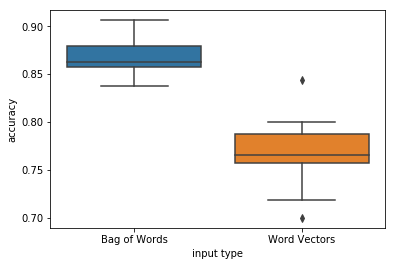

In [39]:
boxplot(x='input type', y='accuracy', data=rnn_scores_data_frame)
plt.show()

We are still seeing much higher results for BOW, however our pretrained vectors are doing better than the custom ones trained on the OpSpam dataset. This shows us conclusively that word embeddings do have some value, though perhaps not on a dataset as small as this. When we test over our full